<a href="https://colab.research.google.com/github/fajrulsantoso/Pembelajaran-Mesin_2025-2026/blob/main/kuis1_Pembelajaran_mesin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data loading dan data imputation

soal 1 (5 poin)   

1.   lakukan inspeksi profile data
2.   variabel apa yang memili nilai yang  hilang (missing value) dan berapa jumlahnya



In [8]:
df.isnull().sum(),

(age                 0
 workclass         963
 fnlwgt              0
 education           0
 education-num       0
 marital-status      0
 occupation        966
 relationship        0
 race                0
 sex                 0
 capital-gain        0
 capital-loss        0
 hours-per-week      0
 native-country    274
 income              0
 dtype: int64,)

setelah melakukan  inspeksi profile data  menggunakan **df.isnull().sum(),**  maka iperoleh variabel yang memiliki nilai hilang (missing value) beserta jumlahnya:



1.   workclass → 963 missing values
2.   occupation → 966 missing values
3.   native-country → 274 missing values
4. Variabel lain tidak memiliki missing value (jumlah = 0).



# ## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

 SETELAH MELAKUKAN Identifikasi fitur yang memiliki missing value
Dari hasil soal 1, ada tiga fitur:

workclass → 963 missing values

occupation → 966 missing values

native-country → 274 missing values                                                               

In [13]:
#Melakukan Lakukan imputasi
#Karena ketiga fitur ini adalah variabel kategori
#metode imputasi yang sesuai adalah mengganti nilai hilang dengan modus (nilai yang paling sering muncul).
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])


In [12]:
#digunakan untuk apakah masih ada missing value

df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


# ## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [14]:
for col in ['workclass','education','marital-status','occupation',
            'relationship','race','sex','native-country','income']:
    print(f"{col}:", df[col].unique())


workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' '



1.   workclass: Ada '?' → ganti jadi Others.

1.   education: Sudah rapi, tidak ada masalah

1.   marital-status: Sudah valid, tidak perlu ubah

1.   occupation: Ada '?' → ganti jadi Others.
2.   relationship: Sudah rapi

2.   race: Sudah rapi


2.   sex: Sudah rapi


2.   native-country: Ada '?' → ganti Others, 'Holand-Netherlands' → ubah ke Netherlands



In [16]:
# Ganti kategori "?" dengan "Others"
df['workclass'] = df['workclass'].replace('?', 'Others')
df['occupation'] = df['occupation'].replace('?', 'Others')
df['native-country'] = df['native-country'].replace('?', 'Others')

# Jika ada duplikasi penulisan (misalnya spasi berlebih / kapitalisasi berbeda)
for col in ['workclass','education','marital-status','occupation',
            'relationship','race','sex','native-country','income']:
    df[col] = df[col].str.strip()  # hilangkan spasi di depan/belakang


In [17]:
for col in ['workclass','occupation','native-country']:
    print(f"{col}:", df[col].unique())


workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Others' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


# # Bagian 2 - Visual Inspection
## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)


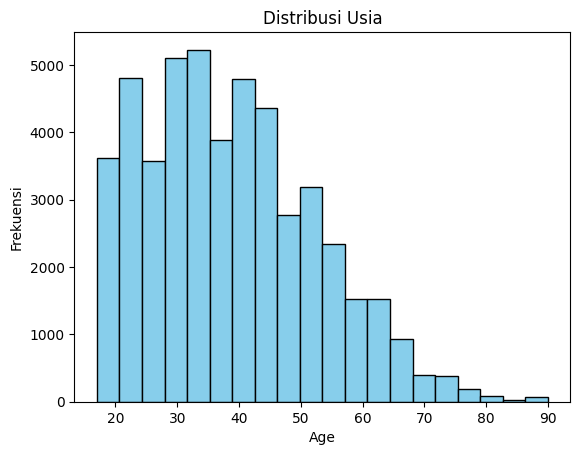

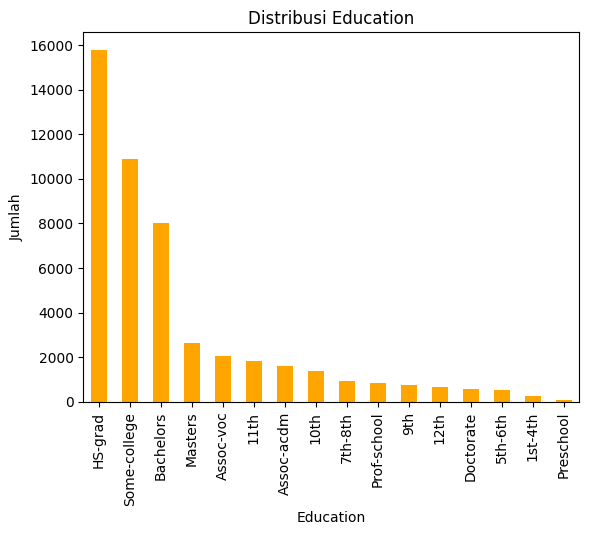

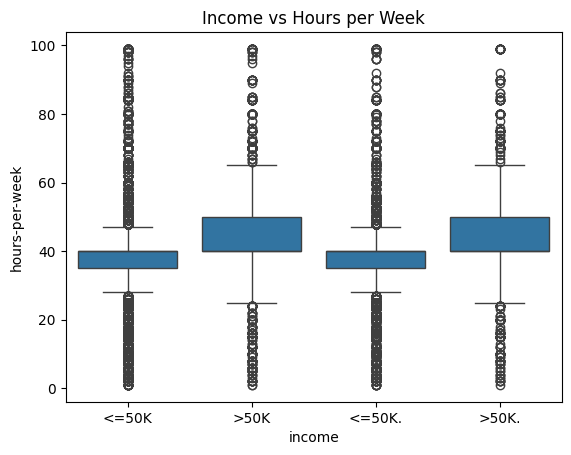

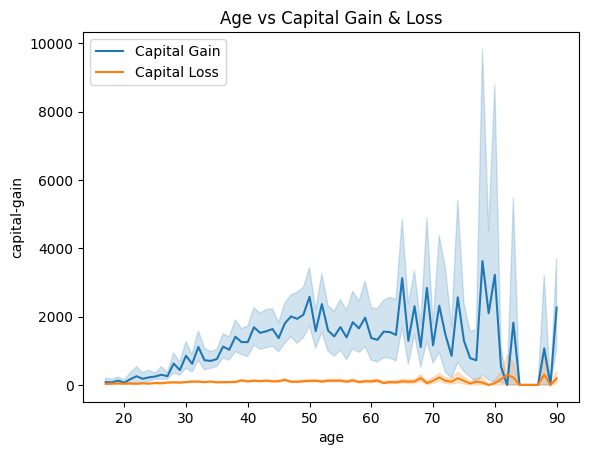

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram kolom age
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

# 2. Bar chart kolom education
df['education'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribusi Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.show()

# 3. Boxplot income vs hours-per-week
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Income vs Hours per Week')
plt.show()

# 4. Lineplot age vs capital-gain & capital-loss
sns.lineplot(x='age', y='capital-gain', data=df, label='Capital Gain')
sns.lineplot(x='age', y='capital-loss', data=df, label='Capital Loss')
plt.title('Age vs Capital Gain & Loss')
plt.legend()
plt.show()


#Penjelasan tiap langkah

1. **Histogram (age)**
      

*   plt.hist() dipakai untuk melihat distribusi umur.
*   bins=20 → membagi data umur ke 20 kelompok

2. **Bar chart (education)**

*   value_counts() menghitung jumlah tiap kategori pendidikan
*   plot(kind='bar') menggambar batang.

3. ** Boxplot (income vs hours-per-week)**


*   sns.boxplot() membandingkan jam kerja antara dua kelompok income (<=50K dan >50K).
*   Bisa lihat median, sebaran, dan outlier.

4. **Lineplot (age vs capital-gain & capital-loss)**  

*   sns.lineplot() menggambar hubungan umur dengan gain/loss.
*   Ada 2 garis → biru (gain) dan oranye/merah (loss).










## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

1. Fenomena pada distribusi data age


*   Distribusi usia cenderung right-skewed (condong ke kiri) → lebih banyak orang di usia 20–50 tahun, dan semakin sedikit di usia di atas 60 tahun.
*   Ada puncak (mode) di sekitar usia 30-an → artinya mayoritas responden berada di usia produktif kerja.

2. Strategi jika ada data hilang pada age  
Gunakan median sebagai pengganti, karena median lebih tahan terhadap outlier dibanding mean.

3. Outlier pada hours-per-week vs income



*   Kategori <=50K punya outlier paling banyak (banyak orang kerja >80 jam/minggu tapi income tetap rendah).
*   Kategori >50K juga ada outlier, tapi lebih sedikit





# Bagian 3 - Encoding Variabel Kategorical

# ## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:
# Buat salinan agar tidak mengubah df asli
df_encoded = df.copy()


In [21]:
# Encoding kolom 'sex'
le_sex = LabelEncoder()
df_encoded['sex'] = le_sex.fit_transform(df_encoded['sex'])


In [22]:
# Encoding kolom 'income' (target)
le_income = LabelEncoder()
df_encoded['income'] = le_income.fit_transform(df_encoded['income'])


In [23]:
# Cek hasil
print(df_encoded[['sex', 'income']].head())


   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


Angka 0 dan 1 muncul karena proses encoding mengubah teks menjadi angka. Pada kolom sex, Female = 0 dan Male = 1. Pada kolom income, <=50K = 0 dan >50K = 1. Jadi hasil tabel hanya menunjukkan data asli yang sudah diubah ke bentuk angka,

# Bagian 4 - Analisis Korelasi                                       ## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ambil kolom yang mau dianalisis
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']


In [27]:
# 2. Ubah income jadi angka (0 = <=50K, 1 = >50K)
df['income'] = df['income'].astype(str).str.strip().replace({'<=50K.':'<=50K','>50K.':'>50K'})
df['income'] = df['income'].map({'<=50K':0, '>50K':1})


In [28]:
# 3. Pastikan semua kolom numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [29]:
# 4. Hitung korelasi
corr = df[cols].corr()
print(corr)

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


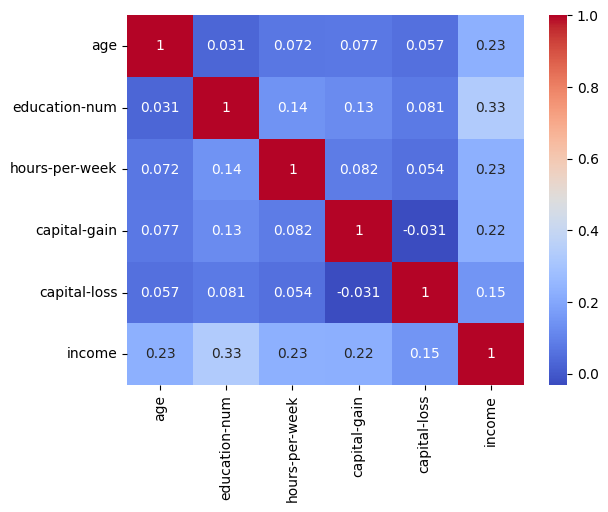

In [30]:
# 5. Visualisasi heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

1. Pilih kolom yang mau kita analisis.

2. Income di-encode ke angka, supaya bisa dihitung korelasi.

3. Konversi ke numeric biar tidak ada error.

4. Hitung korelasi dengan .corr().

5. Visualisasi pakai heatmap supaya lebih mudah dibaca.



# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [31]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


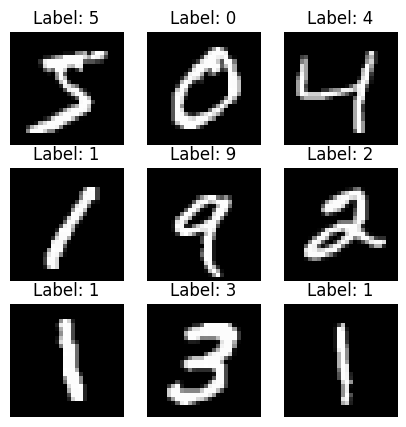

In [32]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

Jumlah data test: 10000
Ukuran tiap gambar: (28, 28)


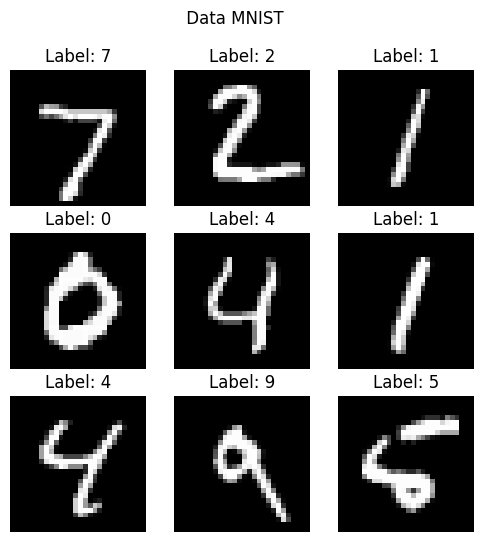

Data test sudah dinormalisasi (skala 0-1).


In [38]:
# Bagian 5 - Pra Pengolahan Data MNIST (Versi Simpel)

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load dataset MNIST (hanya data test yang dipakai)
(_, _), (X_test, y_test) = mnist.load_data()
print("Jumlah data test:", X_test.shape[0])
print("Ukuran tiap gambar:", X_test.shape[1:])

# 2. Tampilkan 9 gambar pertama
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.suptitle(" Data MNIST ")
plt.show()

# 3. Normalisasi data (0-255 → 0-1)
X_test = X_test / 255.0
print("Data test sudah dinormalisasi (skala 0-1).")


## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.image import resize


In [40]:
# 1. Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Tambahkan channel agar jadi (10000, 28, 28, 1)
X_test = X_test[..., np.newaxis].astype("float32")


In [41]:
# 3. Resize semua gambar langsung ke ukuran 32x32
X_test_upsampled = resize(X_test, [32, 32]).numpy()

# 4. Hapus channel (jadi balik ke grayscale 32x32)
X_test_upsampled = X_test_upsampled[:,:,:,0]

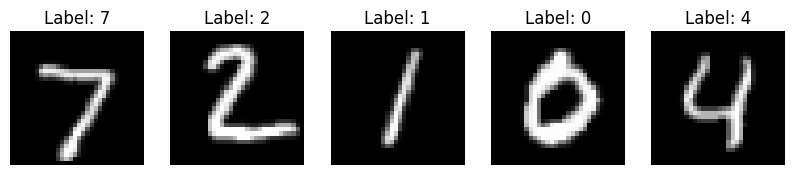

In [42]:
# 5. Tampilkan 5 gambar hasil upsampling
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [43]:
import numpy as np
from tensorflow.keras.datasets import mnist

# 1. Load dataset
(_, _), (X_test, y_test) = mnist.load_data()

# 2. Normalisasi (ubah tipe data ke float32, lalu bagi 255)
X_test_norm = X_test.astype("float32") / 255.0

# 3. Cek hasil normalisasi (nilai min & max harus 0-1)
print("Min:", X_test_norm.min())
print("Max:", X_test_norm.max())


Min: 0.0
Max: 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [46]:
import numpy as np
from skimage.transform import resize
from tensorflow.keras.datasets import mnist

# Load hanya data test
(_, _), (X_test, y_test) = mnist.load_data()

# Resize -> Normalisasi -> Flatten
X_test_flat = np.array([resize(img, (32, 32), anti_aliasing=True).reshape(-1) / 255.0 for img in X_test])

# Cek hasil
print("Shape akhir:", X_test_flat.shape)  # (10000, 1024)
print(" data:", X_test_flat[0][:50])  # tampilkan 50 angka pertama dari data pertama


Shape akhir: (10000, 1024)
 data: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
